### Pandas part 2

In [1]:
import pandas as pd

In [2]:
#import the datacensus2.csv file into a pandas dataframe:
dataframe= pd.read_csv("datacensus2.csv")
dataframe

,Country,Population,Unemployed Persons
0,United Kingdom,68521968,1704000
1,France,65273511,2967000
2,Mexico,128932753,2150582
3,Canada,37742154,1100000
4,Peru,32971854,511000


In [3]:
dataframe['Unemployed Persons'].sum()

8432582

In [4]:
dataframe['Unemployed Persons'].mean()

1686516.4

In [5]:
##Create a new column while calculating a ratio:
ratio= dataframe['Unemployed Persons']/dataframe['Population']
ratio_percentage=ratio*100
ratio_percentage

0    2.486794
1    4.545489
2    1.667987
3    2.914513
4    1.549807
dtype: float64

In [6]:
#Rounding down number to 2 decimals 
ratio_percentage= round(ratio_percentage, 2)
dataframe['Unemployed person %']=ratio_percentage
dataframe

,Country,Population,Unemployed Persons,Unemployed person %
0,United Kingdom,68521968,1704000,2.49
1,France,65273511,2967000,4.55
2,Mexico,128932753,2150582,1.67
3,Canada,37742154,1100000,2.91
4,Peru,32971854,511000,1.55


In [7]:
#save your new dataset:
dataframe.to_csv('newdataset.csv')


In [14]:
#Data filtering using boolean indexing:
dataframe[dataframe['Population']>100000000]

,Country,Population,Unemployed Persons,Unemployed person %
2,Mexico,128932753,2150582,1.67


In [15]:
#dataframe[ ] will return the true condition in a pandas dataframe
df_mexico= dataframe[dataframe['Population']>100000000]
df_mexico

,Country,Population,Unemployed Persons,Unemployed person %
2,Mexico,128932753,2150582,1.67


In [16]:
#Test 2 conditions:
(dataframe['Country']=="Mexico") & (dataframe['Population']==128932753)

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [22]:
#dataframe[ ] will return the true condition in a pandas dataframe:
df_mexico= dataframe[(dataframe['Country']=="Mexico") & (dataframe['Population']==128932753)]
df_mexico

,Country,Population,Unemployed Persons,Unemployed person %
2,Mexico,128932753,2150582,1.67


In [20]:
#If we want to filter the data by keeping only data in the UK:
dataframe[dataframe['Country']=="United Kingdom"]


,Country,Population,Unemployed Persons,Unemployed person %
0,United Kingdom,68521968,1704000,2.49


In [8]:
#Import video games dataframe:
dataframe=pd.read_csv("videogames.csv")
dataframe

,score_phrase,game_title,platform,genre,date_released,score
0,Great,Critter Crunch,iPhone,Puzzle,2008,8.5
1,Great,NHL 13,Xbox 360,Sports,2012,8.5
2,Amazing,Mario Tennis Power Tour,Game Boy,Sports,2005,9.0
3,Awful,Double Dragon: Neon,PlayStation 3,Fighting,2012,3.0
4,Good,Dr. Mario & Puzzle League,Game Boy,Puzzle,2005,7.8
5,Good,Tekken Tag Tournament 2,PlayStation 3,Fighting,2012,7.5
6,Amazing,Puzzle Craft,iPhone,Puzzle,2012,9.0


In [9]:
#Grouping data with groupby():
dataframe.groupby("platform")["score"].median()

platform
Game Boy         8.40
PlayStation 3    5.25
Xbox 360         8.50
iPhone           8.75
Name: score, dtype: float64

In [10]:
#function to return a pandas dataframe:
dataframe.groupby("platform",as_index=False)["score"].mean()

,platform,score
0,Game Boy,8.40
1,PlayStation 3,5.25
2,Xbox 360,8.50
3,iPhone,8.75


In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
#Import the seaborn visualisation library:
import seaborn as sns


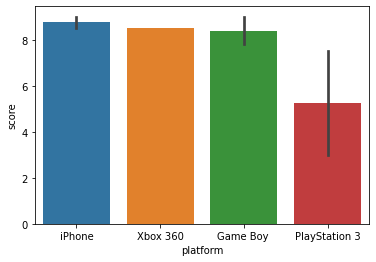

In [12]:
g= sns.barplot(data=dataframe, x='platform', y='score')


In [28]:
#Counting unique values in the column genre:
dataframe["genre"].value_counts()

Puzzle      3
Fighting    2
Sports      2
Name: genre, dtype: int64

In [13]:
#Import JSON data from an url:
url="http://api.open-notify.org/astros.json"
dataframe = pd.read_json(url)
dataframe

,number,people,message
0,10,"{'name': 'Oleg Artemyev', 'craft': 'ISS'}",success
1,10,"{'name': 'Denis Matveev', 'craft': 'ISS'}",success
2,10,"{'name': 'Sergey Korsakov', 'craft': 'ISS'}",success
3,10,"{'name': 'Kjell Lindgren', 'craft': 'ISS'}",success
4,10,"{'name': 'Bob Hines', 'craft': 'ISS'}",success
5,10,"{'name': 'Samantha Cristoforetti', 'craft': 'I...",success
6,10,"{'name': 'Jessica Watkins', 'craft': 'ISS'}",success
7,10,"{'name': 'Cai Xuzhe', 'craft': 'Tiangong'}",success
8,10,"{'name': 'Chen Dong', 'craft': 'Tiangong'}",success
9,10,"{'name': 'Liu Yang', 'craft': 'Tiangong'}",success


In [14]:
#We need to flaten the nested JSON data in the column 'people':
normalised_data=pd.json_normalize(dataframe['people'])
normalised_data

,name,craft
0,Oleg Artemyev,ISS
1,Denis Matveev,ISS
2,Sergey Korsakov,ISS
3,Kjell Lindgren,ISS
4,Bob Hines,ISS
5,Samantha Cristoforetti,ISS
6,Jessica Watkins,ISS
7,Cai Xuzhe,Tiangong
8,Chen Dong,Tiangong
9,Liu Yang,Tiangong


In [15]:
#We need to combine the previous dataframe with the new flatten JSON data:
concat_data= pd.concat([dataframe, normalised_data], axis=1).drop('people', axis=1)
concat_data

,number,message,name,craft
0,10,success,Oleg Artemyev,ISS
1,10,success,Denis Matveev,ISS
2,10,success,Sergey Korsakov,ISS
3,10,success,Kjell Lindgren,ISS
4,10,success,Bob Hines,ISS
5,10,success,Samantha Cristoforetti,ISS
6,10,success,Jessica Watkins,ISS
7,10,success,Cai Xuzhe,Tiangong
8,10,success,Chen Dong,Tiangong
9,10,success,Liu Yang,Tiangong


In [18]:
#Import data from an API:
import requests

In [19]:
url="https://disease.sh/v3/covid-19/countries"
url

'https://disease.sh/v3/covid-19/countries'

In [20]:
url="https://disease.sh/v3/covid-19/countries"
API_requests= requests.get(url)
API_requests

<Response [200]>

In [22]:
#Import json module:
import json
#Get the request into text and change it to JSON format:
data_API= API_requests.text
json_data=json.loads(data_API)
json_data

[{'updated': 1654709059475,
  'country': 'Afghanistan',
  'countryInfo': {'_id': 4,
   'iso2': 'AF',
   'iso3': 'AFG',
   'lat': 33,
   'long': 65,
   'flag': 'https://disease.sh/assets/img/flags/af.png'},
  'cases': 180741,
  'todayCases': 53,
  'deaths': 7709,
  'todayDeaths': 0,
  'recovered': 163215,
  'todayRecovered': 0,
  'active': 9817,
  'critical': 1124,
  'casesPerOneMillion': 4450,
  'deathsPerOneMillion': 190,
  'tests': 971529,
  'testsPerOneMillion': 23919,
  'population': 40618265,
  'continent': 'Asia',
  'oneCasePerPeople': 225,
  'oneDeathPerPeople': 5269,
  'oneTestPerPeople': 42,
  'activePerOneMillion': 241.69,
  'recoveredPerOneMillion': 4018.27,
  'criticalPerOneMillion': 27.67},
 {'updated': 1654709059460,
  'country': 'Albania',
  'countryInfo': {'_id': 8,
   'iso2': 'AL',
   'iso3': 'ALB',
   'lat': 41,
   'long': 20,
   'flag': 'https://disease.sh/assets/img/flags/al.png'},
  'cases': 276468,
  'todayCases': 0,
  'deaths': 3497,
  'todayDeaths': 0,
  'recove

In [23]:
dataframe= pd.DataFrame(json_data)
dataframe.tail()

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
225,1654709059794,Wallis and Futuna,"{'_id': 876, 'iso2': 'WF', 'iso3': 'WLF', 'lat...",454,0,7,0,438,0,9,...,20508,1888398,10860,Australia-Oceania,24,1551,1,828.73,40331.49,0.00
226,1654709059799,Western Sahara,"{'_id': 732, 'iso2': 'EH', 'iso3': 'ESH', 'lat...",10,0,1,0,9,0,0,...,0,0,625647,Africa,62565,625647,0,0.00,14.39,0.00
227,1654709059769,Yemen,"{'_id': 887, 'iso2': 'YE', 'iso3': 'YEM', 'lat...",11822,0,2149,0,9107,0,566,...,265253,8531,31092189,Asia,2630,14468,117,18.20,292.90,0.74
228,1654709059370,Zambia,"{'_id': 894, 'iso2': 'ZM', 'iso3': 'ZMB', 'lat...",322790,228,3988,0,317705,37,1097,...,3499186,180591,19376272,Africa,60,4859,6,56.62,16396.60,0.00
229,1654709059466,Zimbabwe,"{'_id': 716, 'iso2': 'ZW', 'iso3': 'ZWE', 'lat...",253637,0,5515,0,245593,0,2529,...,2348640,153706,15280042,Africa,60,2771,7,165.51,16072.80,0.79
